In [1]:
import os 
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [2]:
# Referernce: https://github.com/hoya012/CVPR-2019-Paper-Statistics
# Referernce: https://github.com/ShaofengZou/CVPR-2020-Paper-Code-Statistics
lemmatizer = WordNetLemmatizer()
excluded = ['learn','network', 'neural', 'deep',  'use', 'multi', 'single', 'towards', 'based', 'method', 'framework', 'task',
            'model', 'improve',  'via', 'however']

In [3]:
def wordnetPos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [4]:
def stopword(title):
    word_split = title
    valid_word = []
    for word in word_split:
        word = word.strip().strip(string.digits)
        if word != "":
            valid_word.append(word) #去掉引号
    word_split = valid_word
    stop_words = set(stopwords.words('english'))
    punctuations = list(string.punctuation)     # add punctuations
    [stop_words.add(punc) for punc in punctuations]
    stop_words.add("null") # remove null
    stop_words.update(excluded)
    return [word for word in word_split if word not in stop_words]

In [5]:
def lemmatize(title): # doing->do
    word_list = nltk.word_tokenize(title)
    return [lemmatizer.lemmatize(w.lower(), wordnetPos(w)) for w in word_list]

In [6]:
def transform(title):
    title = title.strip()#移除字符串头尾指定的字符(默认为空格或换行符)或字符序列
    title = lemmatize(title) #去掉进行时
    title = stopword(title) #去掉停词
    return ' '.join(title)

## Load oral

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from imageio import imread
from wordcloud import WordCloud

In [8]:
df_oral = pd.read_csv('paper2021oral.tsv', index_col=0, sep='\t')
print('# Oral papers:', len(df_oral))
df_oral.head()

# Oral papers: 53


,title,link,keywords,abstract
paper_id,,,,
nIAxjsniDzg,What Matters for On-Policy Deep Actor-Critic M...,https://openreview.net/forum?id=nIAxjsniDzg,"Reinforcement learning, continuous control","In recent years, reinforcement learning (RL) h..."
rC8sJ4i6kaH,Theoretical Analysis of Self-Training with Dee...,https://openreview.net/forum?id=rC8sJ4i6kaH,"deep learning theory, domain adaptation theory...","Self-training algorithms, which train a model ..."
rALA0Xo6yNJ,Learning to Reach Goals via Iterated Supervise...,https://openreview.net/forum?id=rALA0Xo6yNJ,"goal reaching, reinforcement learning, behavio...",Current reinforcement learning (RL) algorithms...
m5Qsh0kBQG,Deep symbolic regression: Recovering mathemati...,https://openreview.net/forum?id=m5Qsh0kBQG,"symbolic regression, reinforcement learning, a...",Discovering the underlying mathematical expres...
PULSD5qI2N1,Optimal Rates for Averaged Stochastic Gradient...,https://openreview.net/forum?id=PULSD5qI2N1,"stochastic gradient descent, two-layer neural ...",We analyze the convergence of the averaged sto...


## Load poster presentations

In [9]:
df_post = pd.read_csv('paper2021post.tsv', index_col=0, sep='\t')
print('# Poster Presentations papers:', len(df_post))
df_post.head()

# Poster Presentations papers: 693


,title,link,keywords,abstract
paper_id,,,,
YwpZmcAehZ,Revisiting Dynamic Convolution via Matrix Deco...,https://openreview.net/forum?id=YwpZmcAehZ,"supervised representation learning, efficient ...",Recent research in dynamic convolution shows s...
A5VV3UyIQz,Explainable Deep One-Class Classification,https://openreview.net/forum?id=A5VV3UyIQz,"anomaly-detection, deep-learning, explanations...",Deep one-class classification variants for ano...
lU5Rs_wCweN,Taking Notes on the Fly Helps Language Pre-Tra...,https://openreview.net/forum?id=lU5Rs_wCweN,"Natural Language Processing, Pre-training",How to make unsupervised language pre-training...
l-LGlk4Yl6G,Mixed-Features Vectors and Subspace Splitting,https://openreview.net/forum?id=l-LGlk4Yl6G,NaN,"Motivated by metagenomics, recommender systems..."
o966_Is_nPA,Neural Pruning via Growing Regularization,https://openreview.net/forum?id=o966_Is_nPA,"model compression, deep neural network pruning...",Regularization has long been utilized to learn...


## Load spotlight presentations

In [10]:
df_spot = pd.read_csv('paper2021spot.tsv', index_col=0, sep='\t')
print('# Spotlight Presentations papers:', len(df_spot))
df_spot.head()

# Spotlight Presentations papers: 114


,title,link,keywords,abstract
paper_id,,,,
pBqLS-7KYAF,Sparse Quantized Spectral Clustering,https://openreview.net/forum?id=pBqLS-7KYAF,"Eigenspectrum, high-dimensional statistic, ran...","Given a large data matrix, sparsifying, quanti..."
HHSEKOnPvaO,Graph-Based Continual Learning,https://openreview.net/forum?id=HHSEKOnPvaO,NaN,"Despite significant advances, continual learni..."
Vfs_2RnOD0H,Dynamic Tensor Rematerialization,https://openreview.net/forum?id=Vfs_2RnOD0H,"Rematerialization, Memory-saving, Runtime Syst...",Checkpointing enables the training of deep lea...
F1vEjWK-lH_,Gradient Vaccine: Investigating and Improving ...,https://openreview.net/forum?id=F1vEjWK-lH_,"Multi-task Learning, Multilingual Modeling",Massively multilingual models subsuming tens o...
87ZwsaQNHPZ,CPT: Efficient Deep Neural Network Training vi...,https://openreview.net/forum?id=87ZwsaQNHPZ,"Efficient training, low precision training",Low-precision deep neural network (DNN) traini...


## Load withdraw/rejected submissions

In [11]:
df_wthd = pd.read_csv('paper2021wthd.tsv', index_col=0, sep='\t')
print('# Withdraw/Rejected Submissions papers:', len(df_wthd))
df_wthd.head()

# Withdraw/Rejected Submissions papers: 2154


,title,link,keywords,abstract
paper_id,,,,
meG3o0ttiAD,Toward Trainability of Quantum Neural Networks,https://openreview.net/forum?id=meG3o0ttiAD,"Near-term Quantum Algorithm, Quantum Neural Ne...",Quantum Neural Networks (QNNs) have been recen...
AJY3fGPF1DC,Selecting Treatment Effects Models for Domain ...,https://openreview.net/forum?id=AJY3fGPF1DC,"causal inference, treatment effects, healthcare",Selecting causal inference models for estimati...
_O9YLet0wvN,Closing the Generalization Gap in One-Shot Obj...,https://openreview.net/forum?id=_O9YLet0wvN,"One-Shot Learning, Few-Shot Learning, Object D...",Despite substantial progress in object detecti...
WoLQsYU8aZ,PettingZoo: Gym for Multi-Agent Reinforcement ...,https://openreview.net/forum?id=WoLQsYU8aZ,"Reinforcement Learning, Multi-agent Reinforcem...","OpenAI's Gym library contains a large, divers..."
Sc8cY4Jpi3s,Towards Practical Second Order Optimization fo...,https://openreview.net/forum?id=Sc8cY4Jpi3s,"large scale distributed deep learning, second ...","Optimization in machine learning, both theoret..."


## Hot title

### Oral

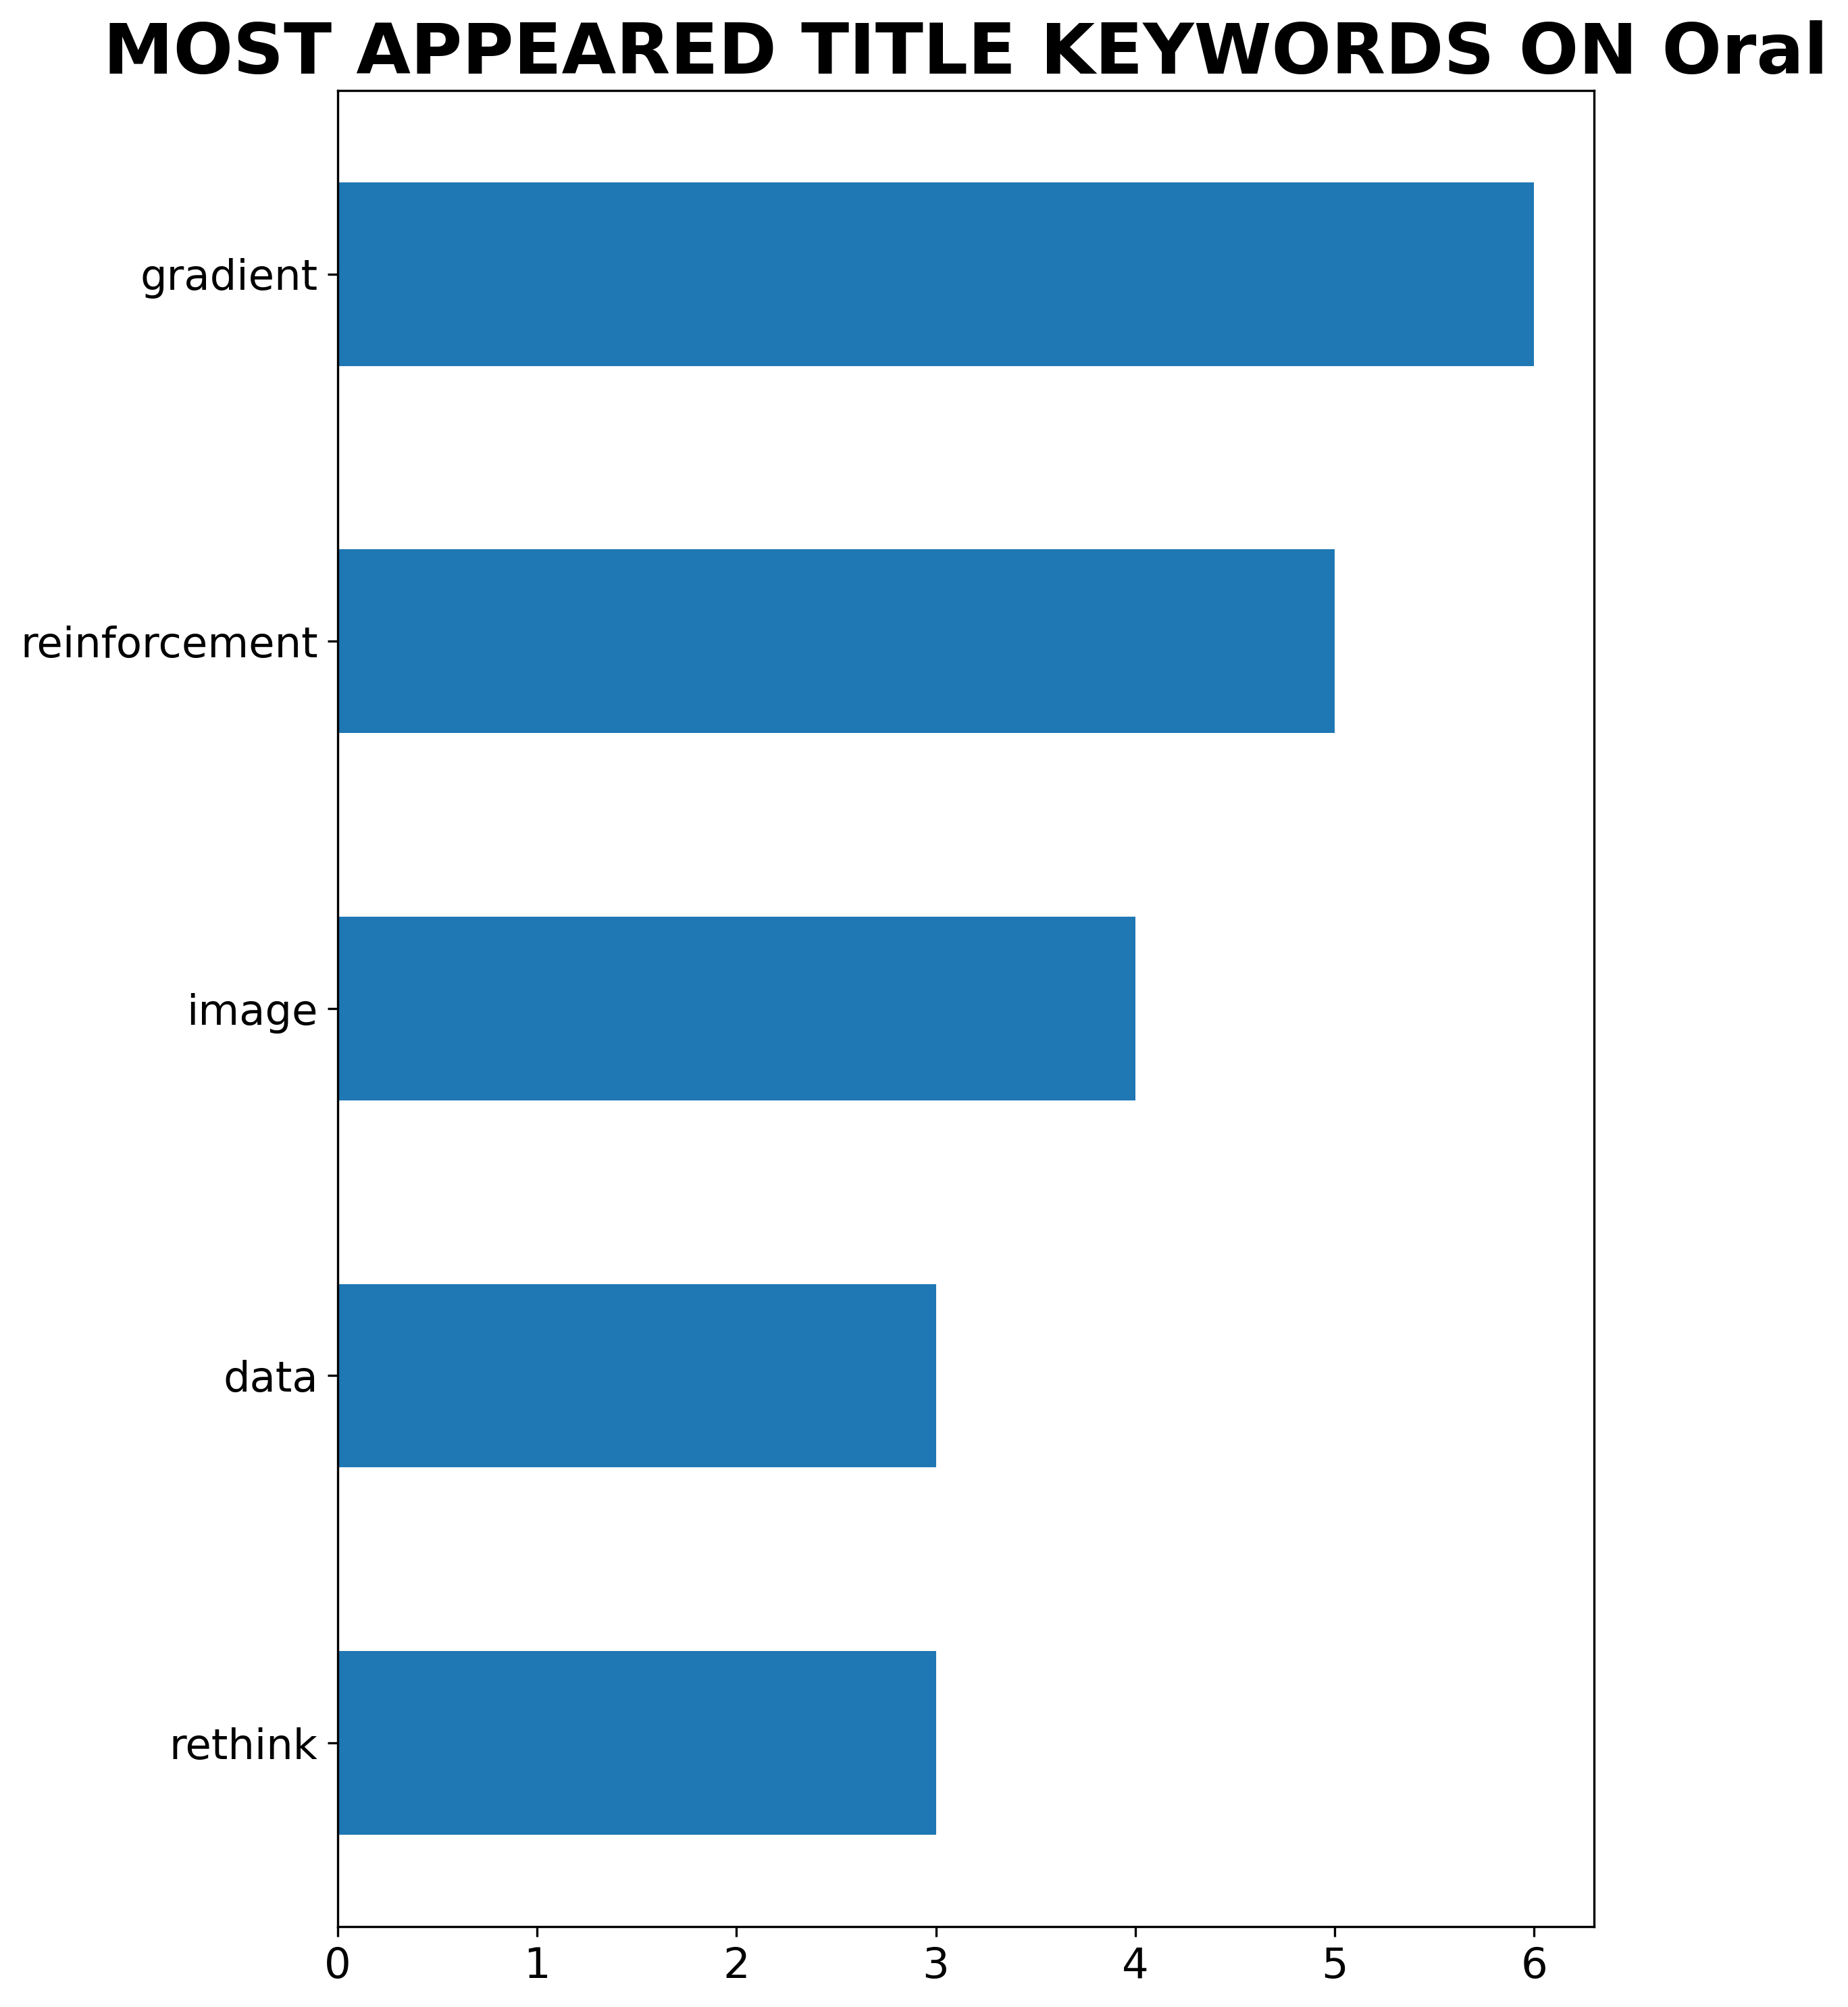

In [12]:
words_oral = pd.Series(
    ' '.join(df_oral['title'].dropna().apply(transform)).split(' ')
).str.strip()

counts_oral = words_oral.value_counts().sort_values(ascending=True)

plt.subplots(dpi=300)
counts_oral.iloc[-5:].plot.barh(figsize=(8, 12), fontsize=15) #五个最火的标题关键词
plt.title(f'MOST APPEARED TITLE KEYWORDS ON Oral', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.savefig('new/most_title_oral.png', dpi=300, bbox_inches='tight')

### spotlight presentations

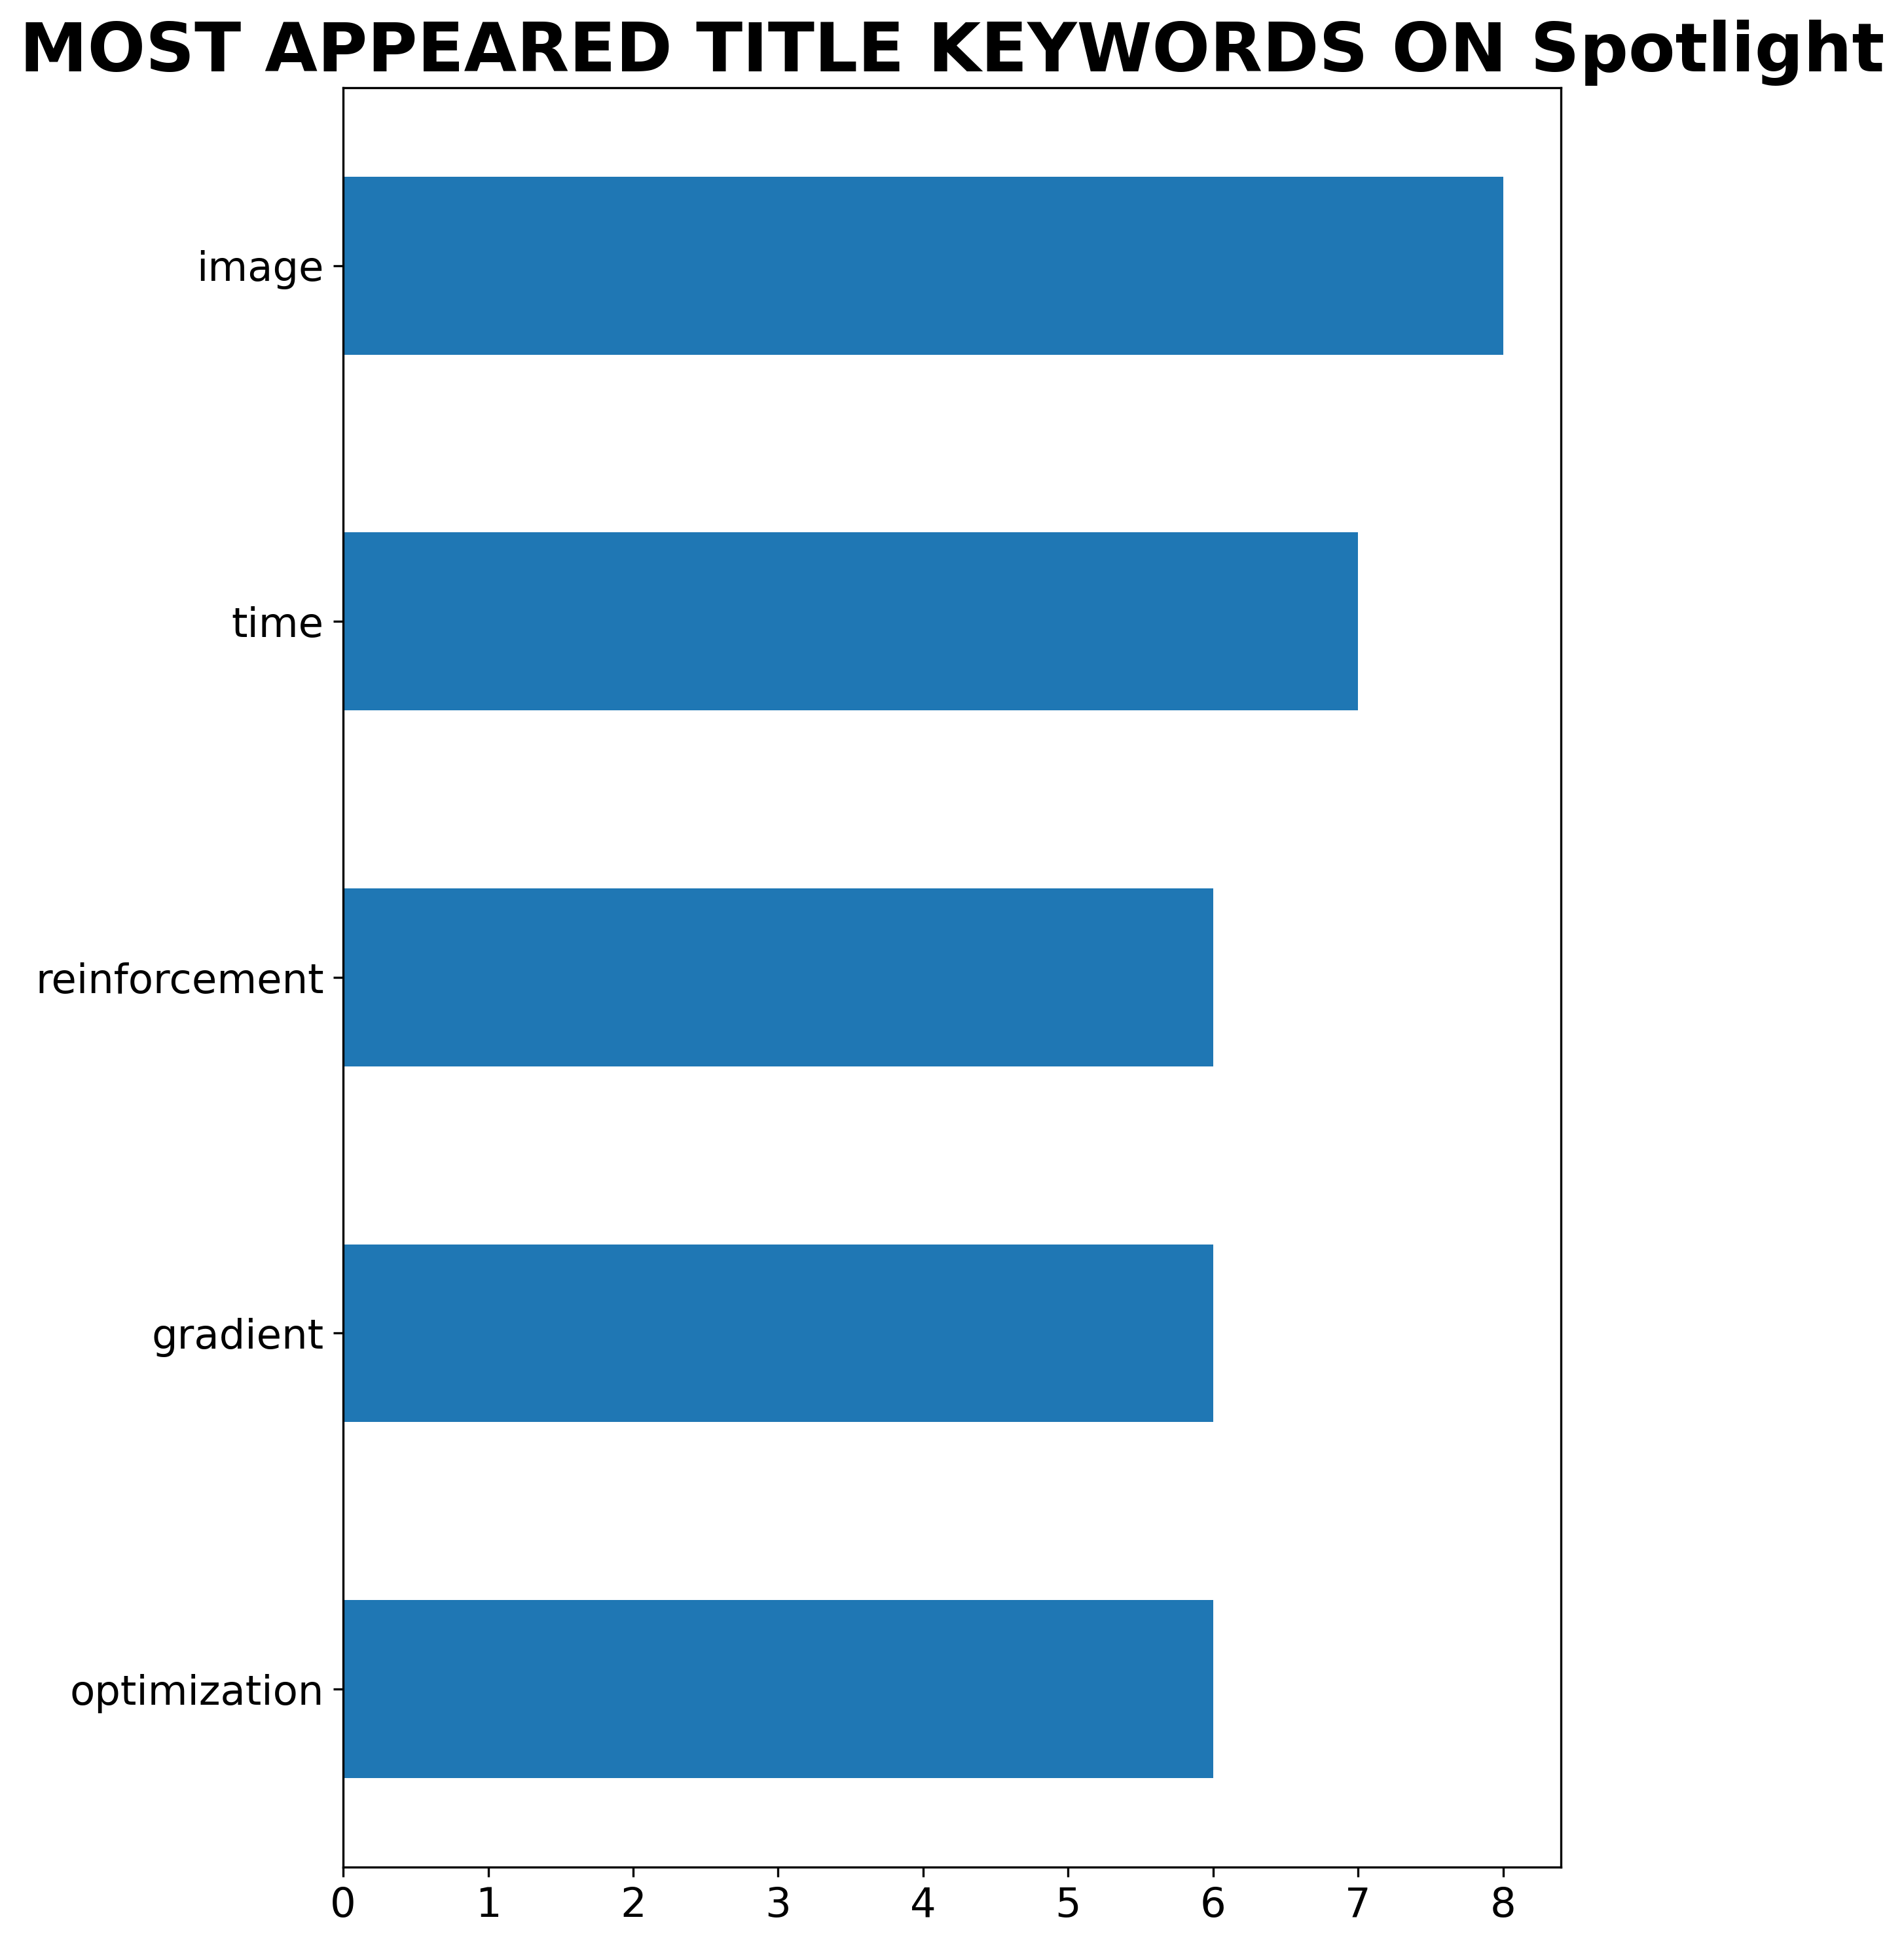

In [13]:
words_spot = pd.Series(
    ' '.join(df_spot['title'].dropna().apply(transform)).split(' ')
).str.strip()

counts_spot = words_spot.value_counts().sort_values(ascending=True)

plt.subplots(dpi=300)
counts_spot.iloc[-5:].plot.barh(figsize=(8, 12), fontsize=15) #五个最火的标题关键词
plt.title(f'MOST APPEARED TITLE KEYWORDS ON Spotlight', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.savefig('new/most_title_spot.png', dpi=300, bbox_inches='tight')

### poster presentations

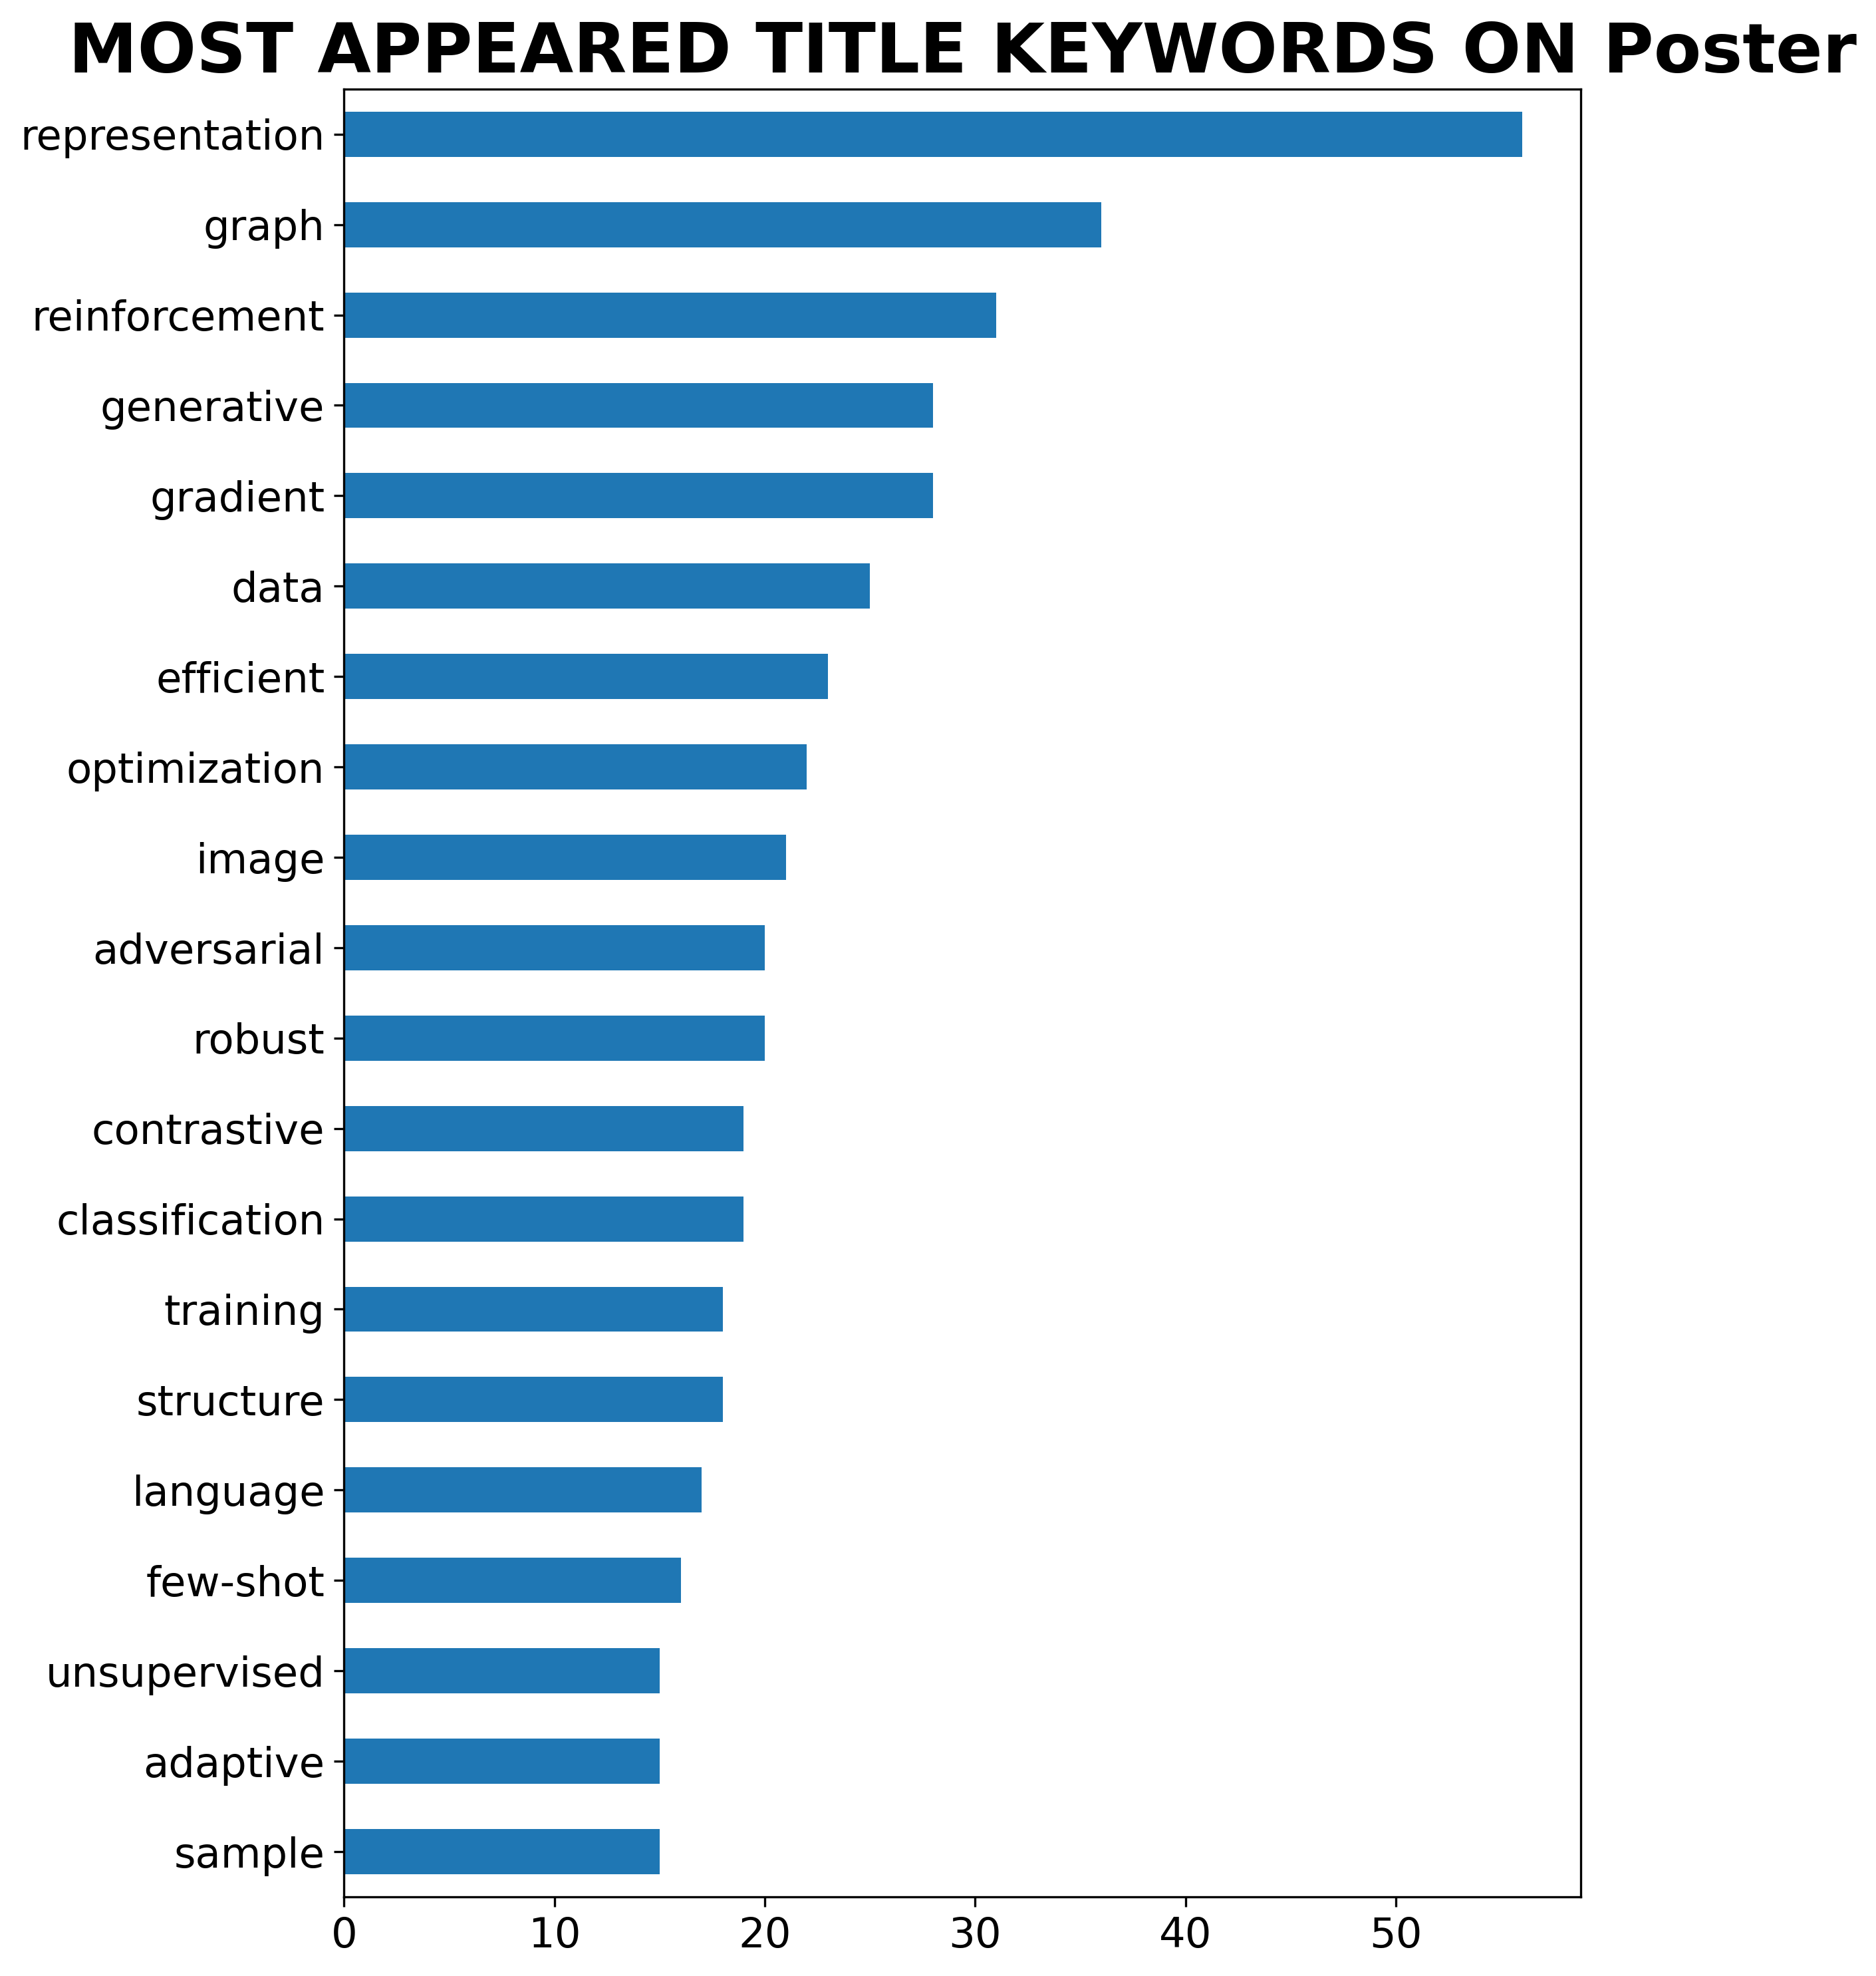

In [14]:
words_post = pd.Series(
    ' '.join(df_post['title'].dropna().apply(transform)).split(' ')
).str.strip()

counts_post = words_post.value_counts().sort_values(ascending=True)

plt.subplots(dpi=300)
counts_post.iloc[-20:].plot.barh(figsize=(8, 12), fontsize=15) #五个最火的标题关键词
plt.title(f'MOST APPEARED TITLE KEYWORDS ON Poster', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.savefig('new/most_title_post.png', dpi=300, bbox_inches='tight')

### merge 3 table

In [15]:
df_orsp = pd.concat([df_oral,df_spot],ignore_index=True)
df_all = pd.concat([df_orsp,df_post],ignore_index=True)
df_all.head()
print('ALL ACCEPT PAPER without withdraw/reject:',len(df_all))

ALL ACCEPT PAPER without withdraw/reject: 860


## Hot title with oral+post+spot

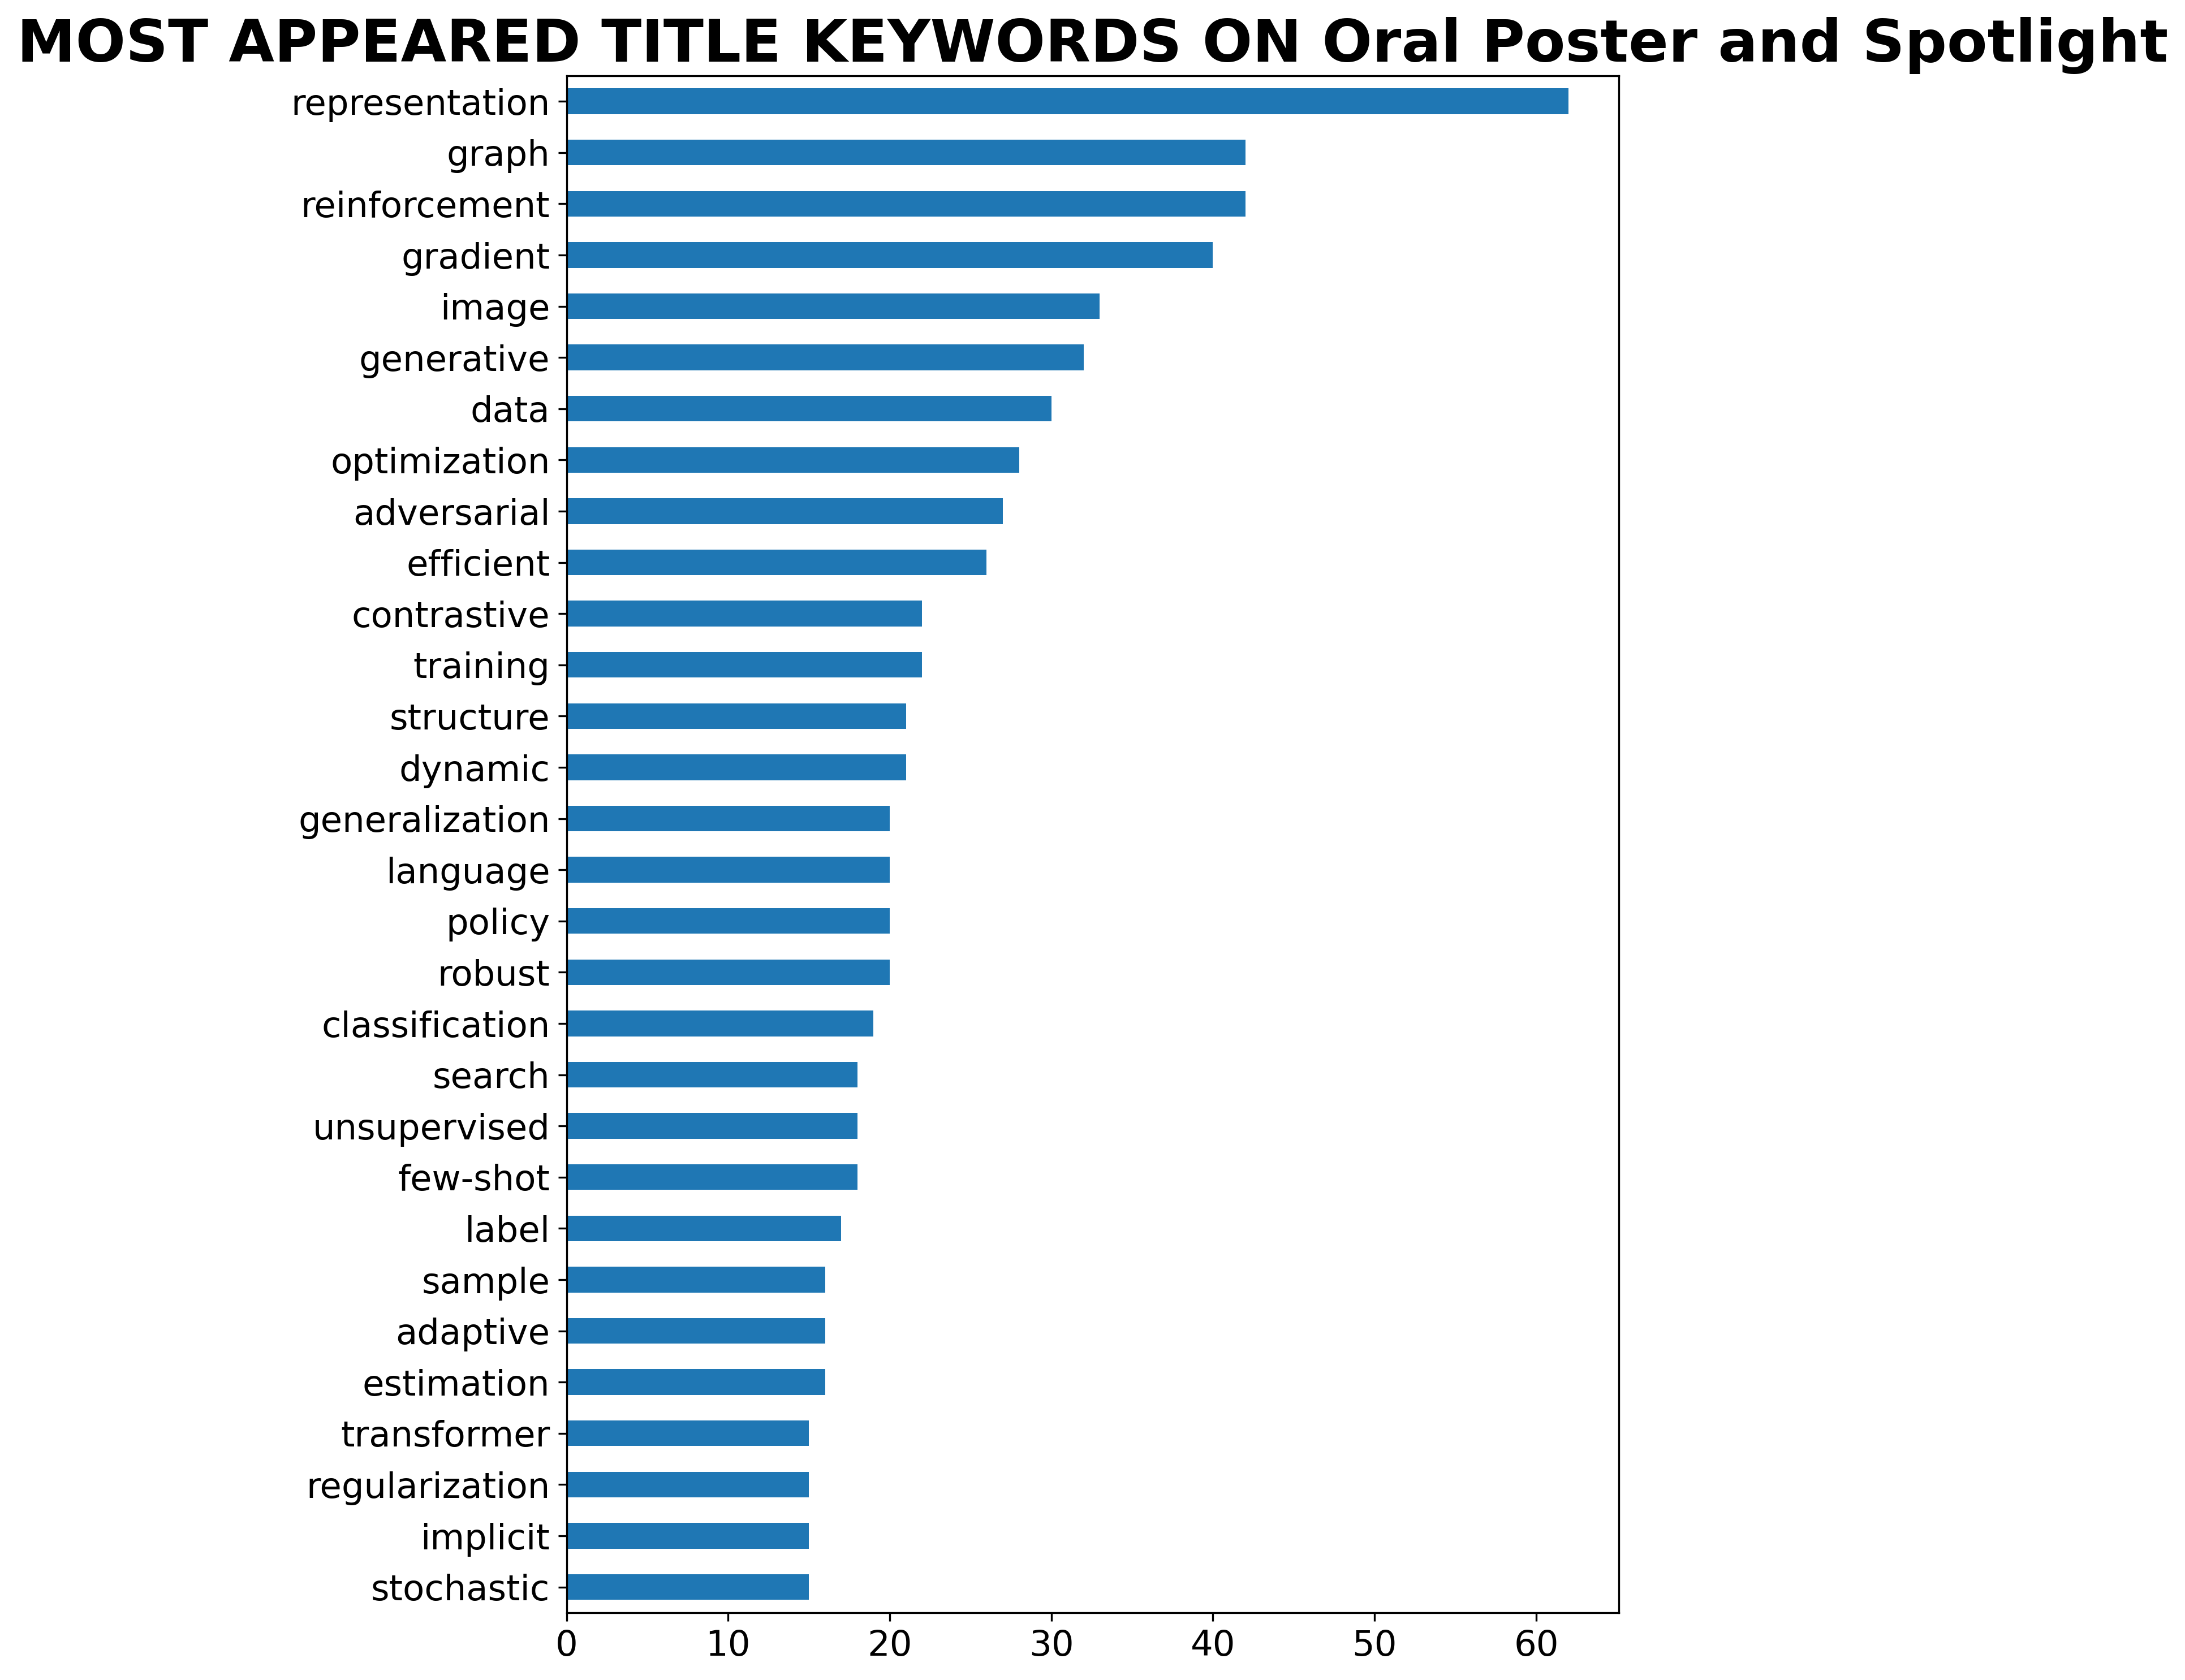

In [16]:
words_all = pd.Series(
    ' '.join(df_all['title'].dropna().apply(transform)).split(' ')
).str.strip()

counts_all = words_all.value_counts().sort_values(ascending=True)

plt.subplots(dpi=300)
counts_all.iloc[-30:].plot.barh(figsize=(8, 12), fontsize=15) #30个最火的标题关键词
plt.title(f'MOST APPEARED TITLE KEYWORDS ON Oral Poster and Spotlight', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.savefig('new/most_title_all_no_wthd.png', dpi=300, bbox_inches='tight')

### merge all table

In [17]:
df_allwthd = pd.concat([df_all,df_wthd],ignore_index=True)
print('ALL ACCEPT PAPER :',len(df_allwthd))

ALL ACCEPT PAPER : 3014


## Hot title with ALL PAPER

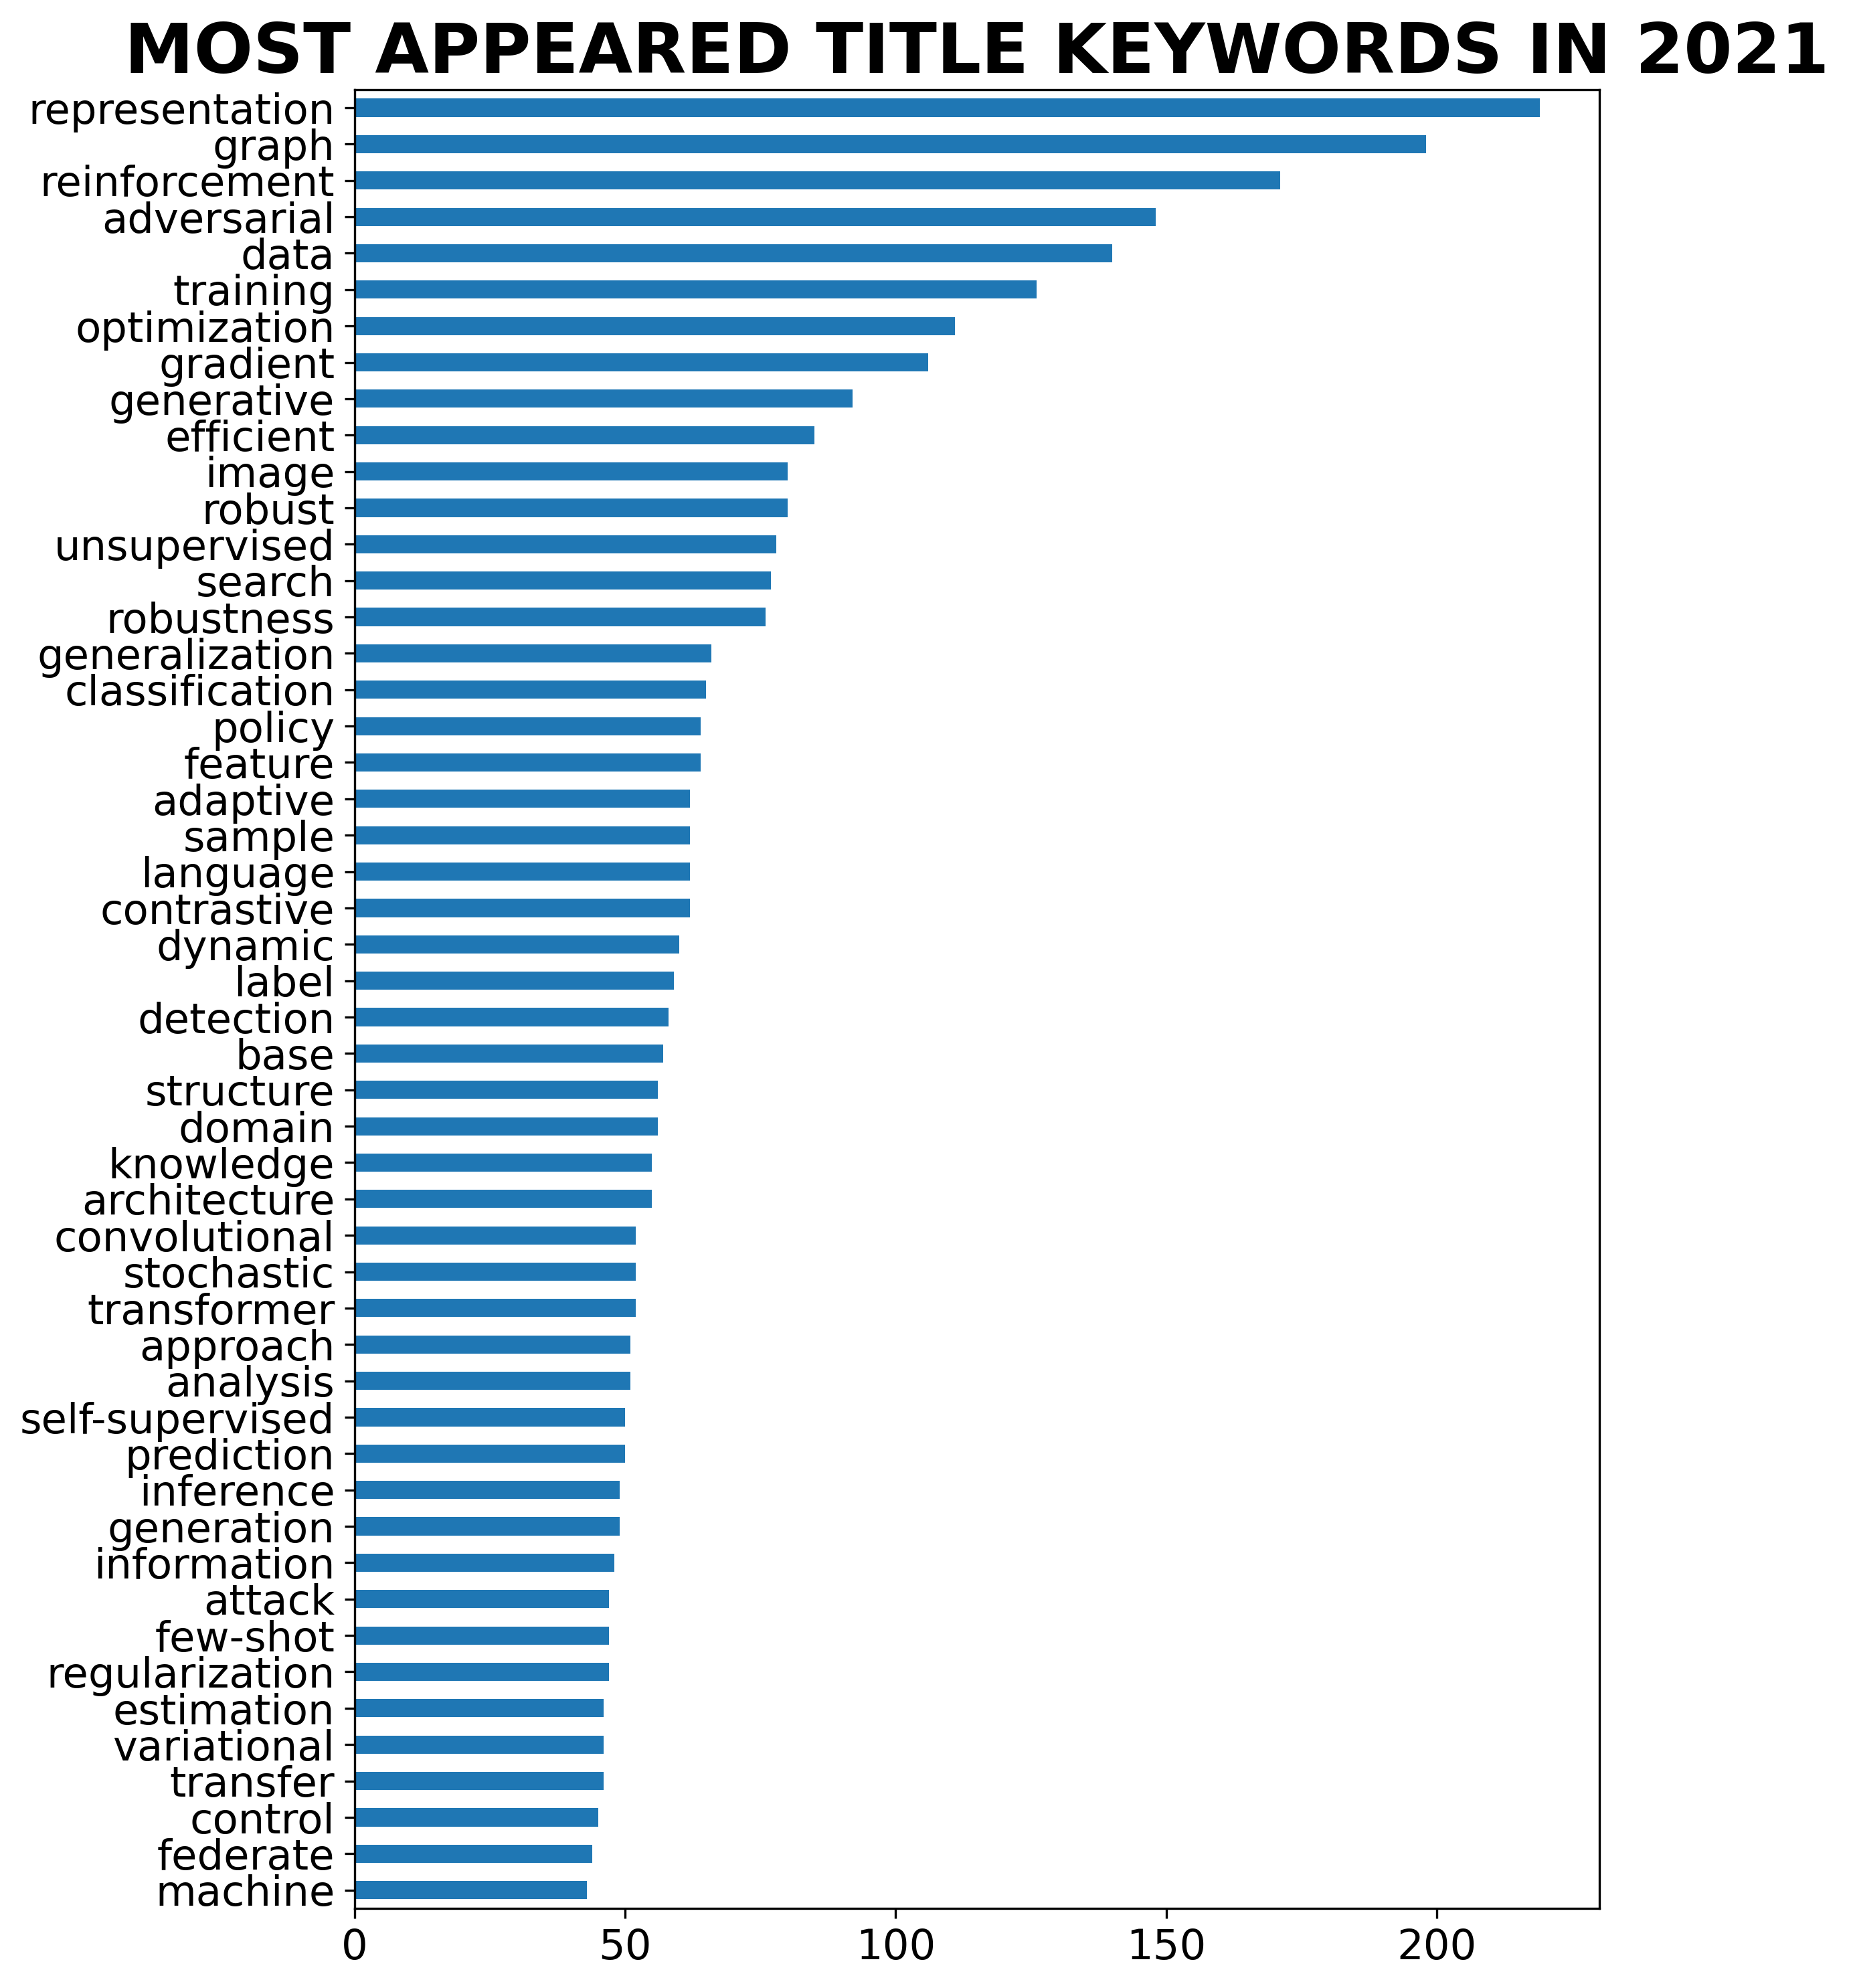

In [18]:
words_allwhd = pd.Series(
    ' '.join(df_allwthd['title'].dropna().apply(transform)).split(' ')
).str.strip()

counts_allwhd = words_allwhd.value_counts().sort_values(ascending=True)

plt.subplots(dpi=300)
counts_allwhd.iloc[-50:].plot.barh(figsize=(8, 12), fontsize=15) #50个最火的标题关键词
plt.title(f'MOST APPEARED TITLE KEYWORDS IN 2021', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.savefig('new/most_title_all_2021.png', dpi=300, bbox_inches='tight')

## ALL PAPER WORDCLOUD WITHOUT WITHDRAW AND REJECT

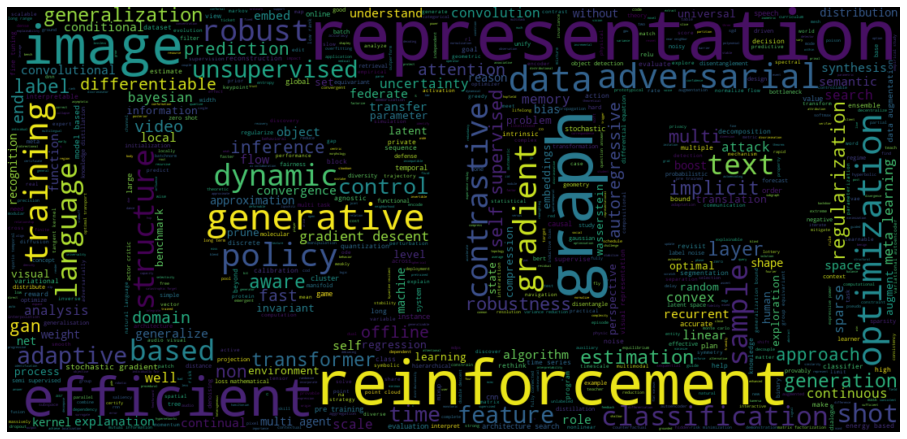

In [19]:
logo = imread('sources/logo.png')
wordcloud = WordCloud(max_words=1800, max_font_size=100, random_state=0, mask=logo).generate(' '.join(words_all))

fig = plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('new/logo_wordcloud_title_2021.png', dpi=300, bbox_inches='tight')

## Keywords

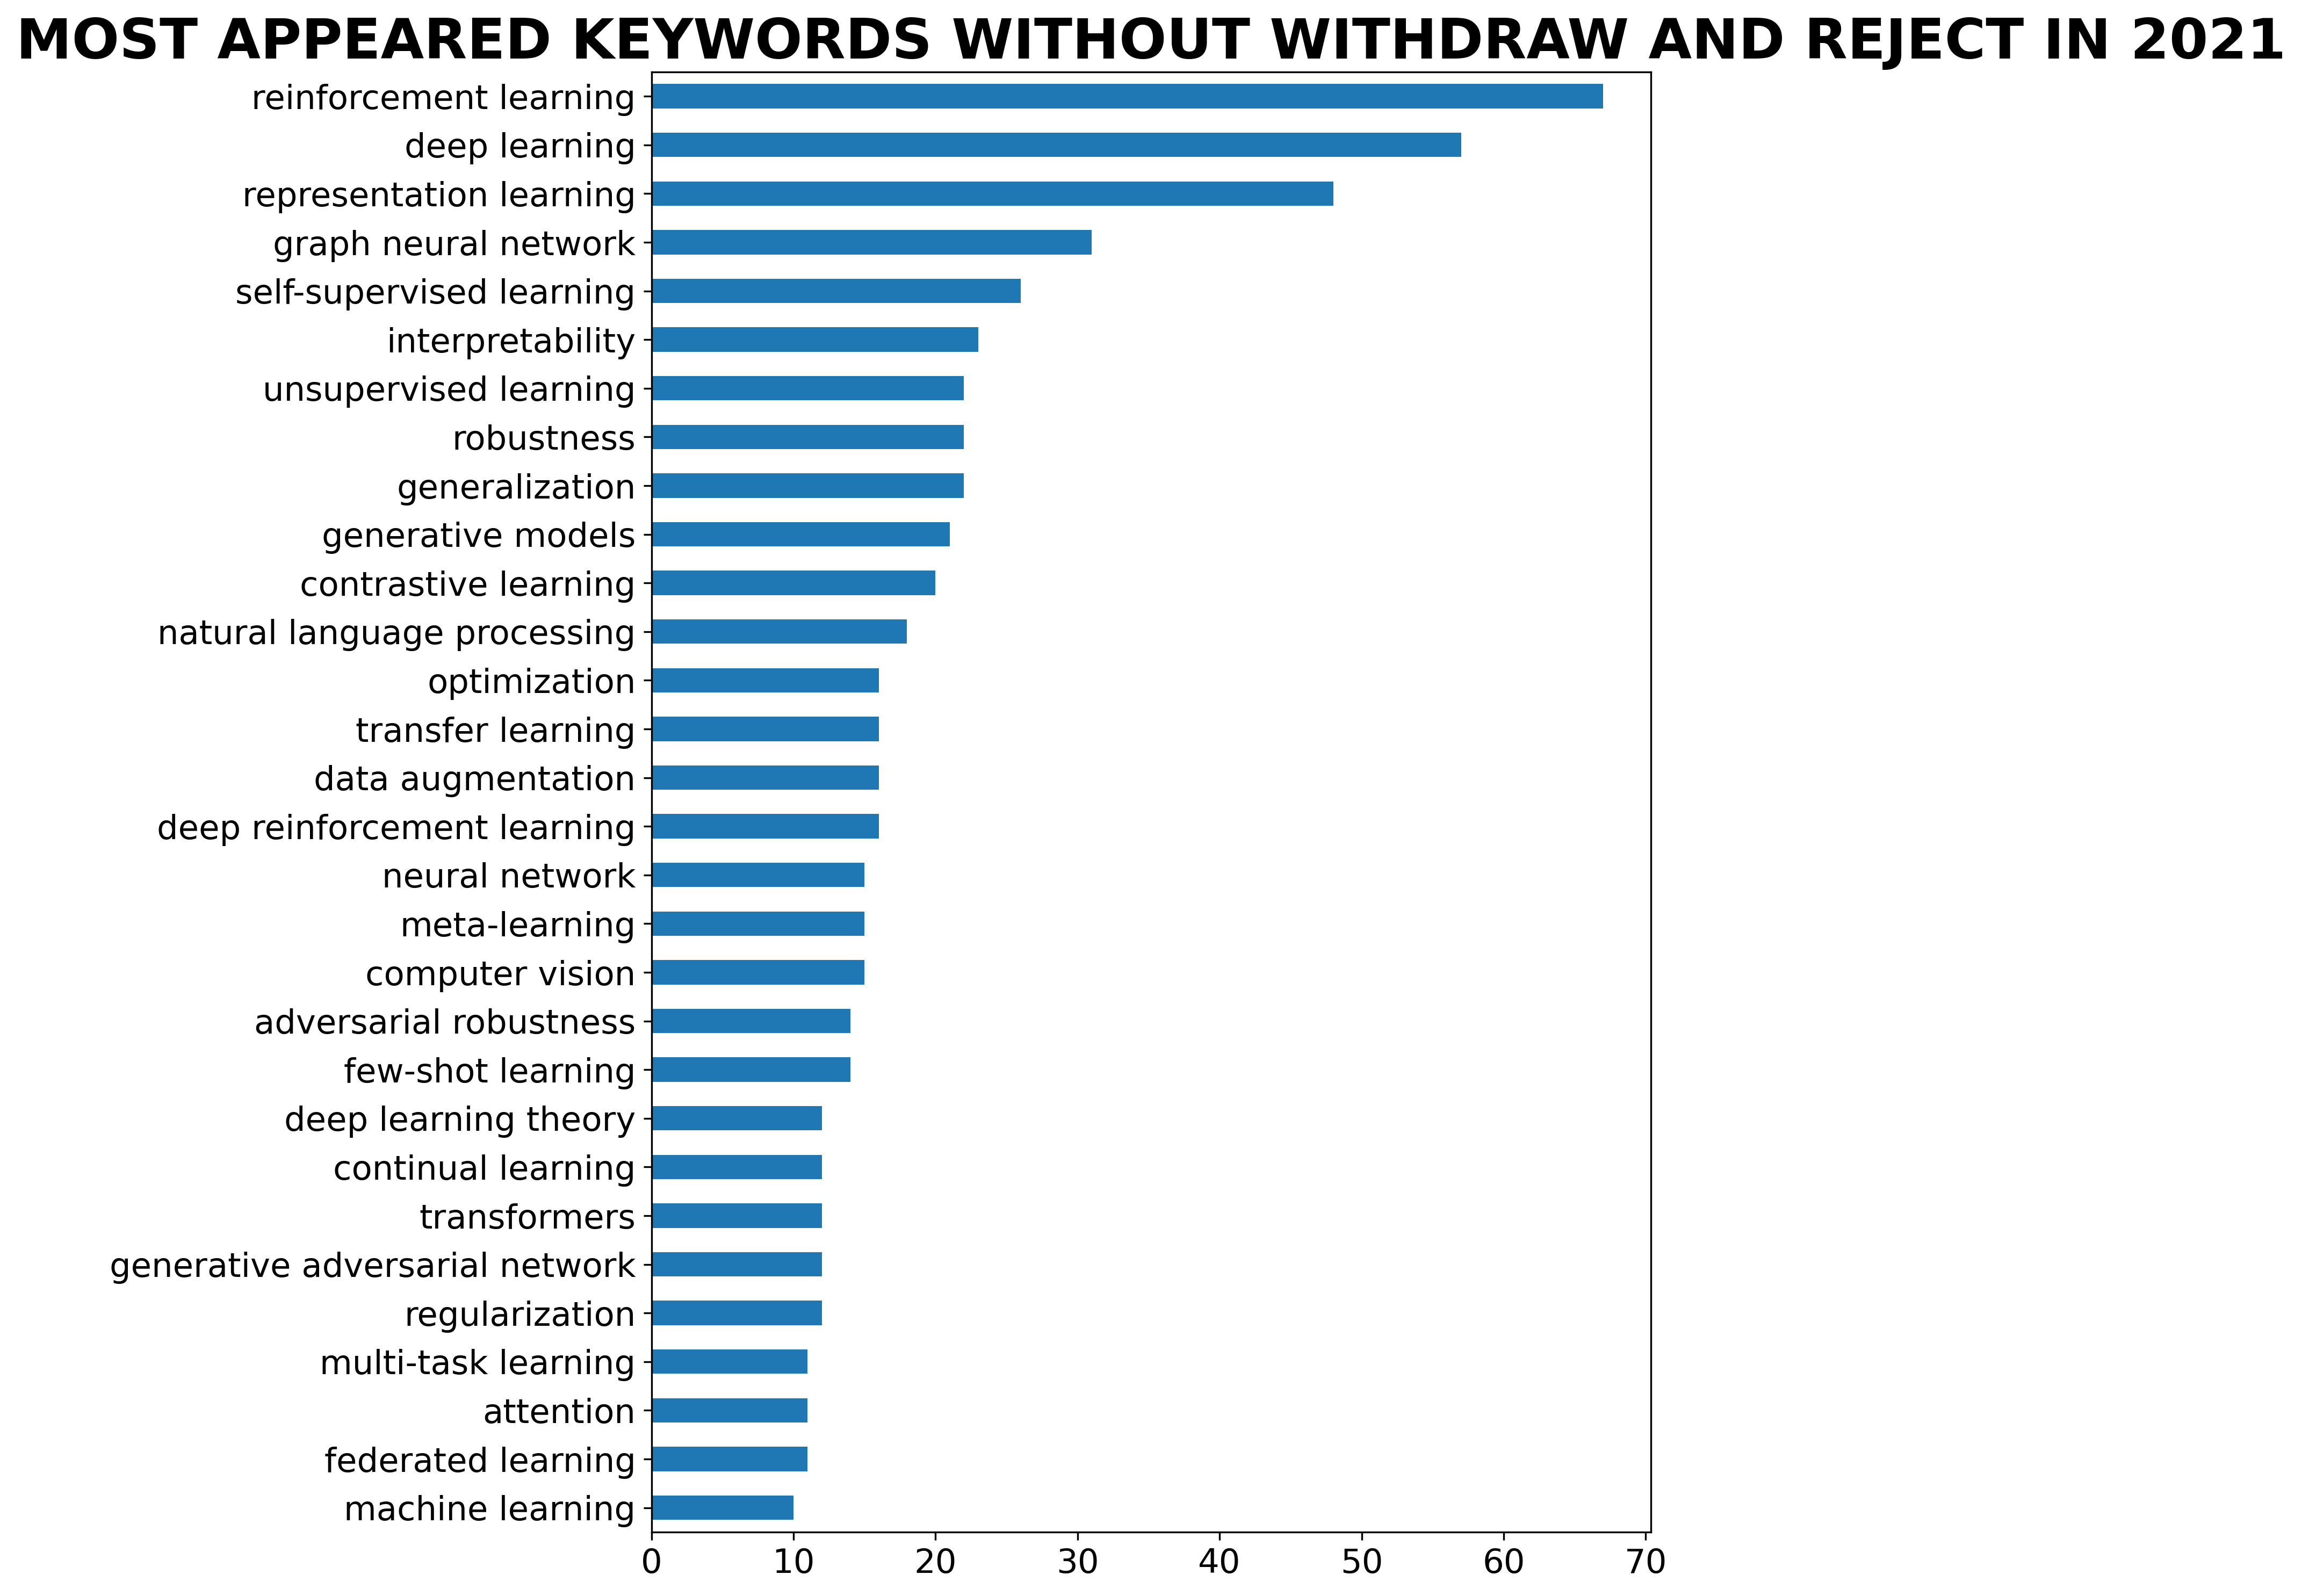

In [20]:
words_key = pd.Series(
    ', '.join(df_all['keywords'].dropna()).lower().replace('networks', 'network').split(',')
).str.strip()

counts_key = words_key.value_counts().sort_values(ascending=True)

plt.subplots(dpi=300)
counts_key.iloc[-30:].plot.barh(figsize=(8, 12), fontsize=15)
plt.title(f'MOST APPEARED KEYWORDS WITHOUT WITHDRAW AND REJECT IN 2021', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.savefig('new/most_keywords_all.png', dpi=300, bbox_inches='tight')

## Keywords with withdraw and reject

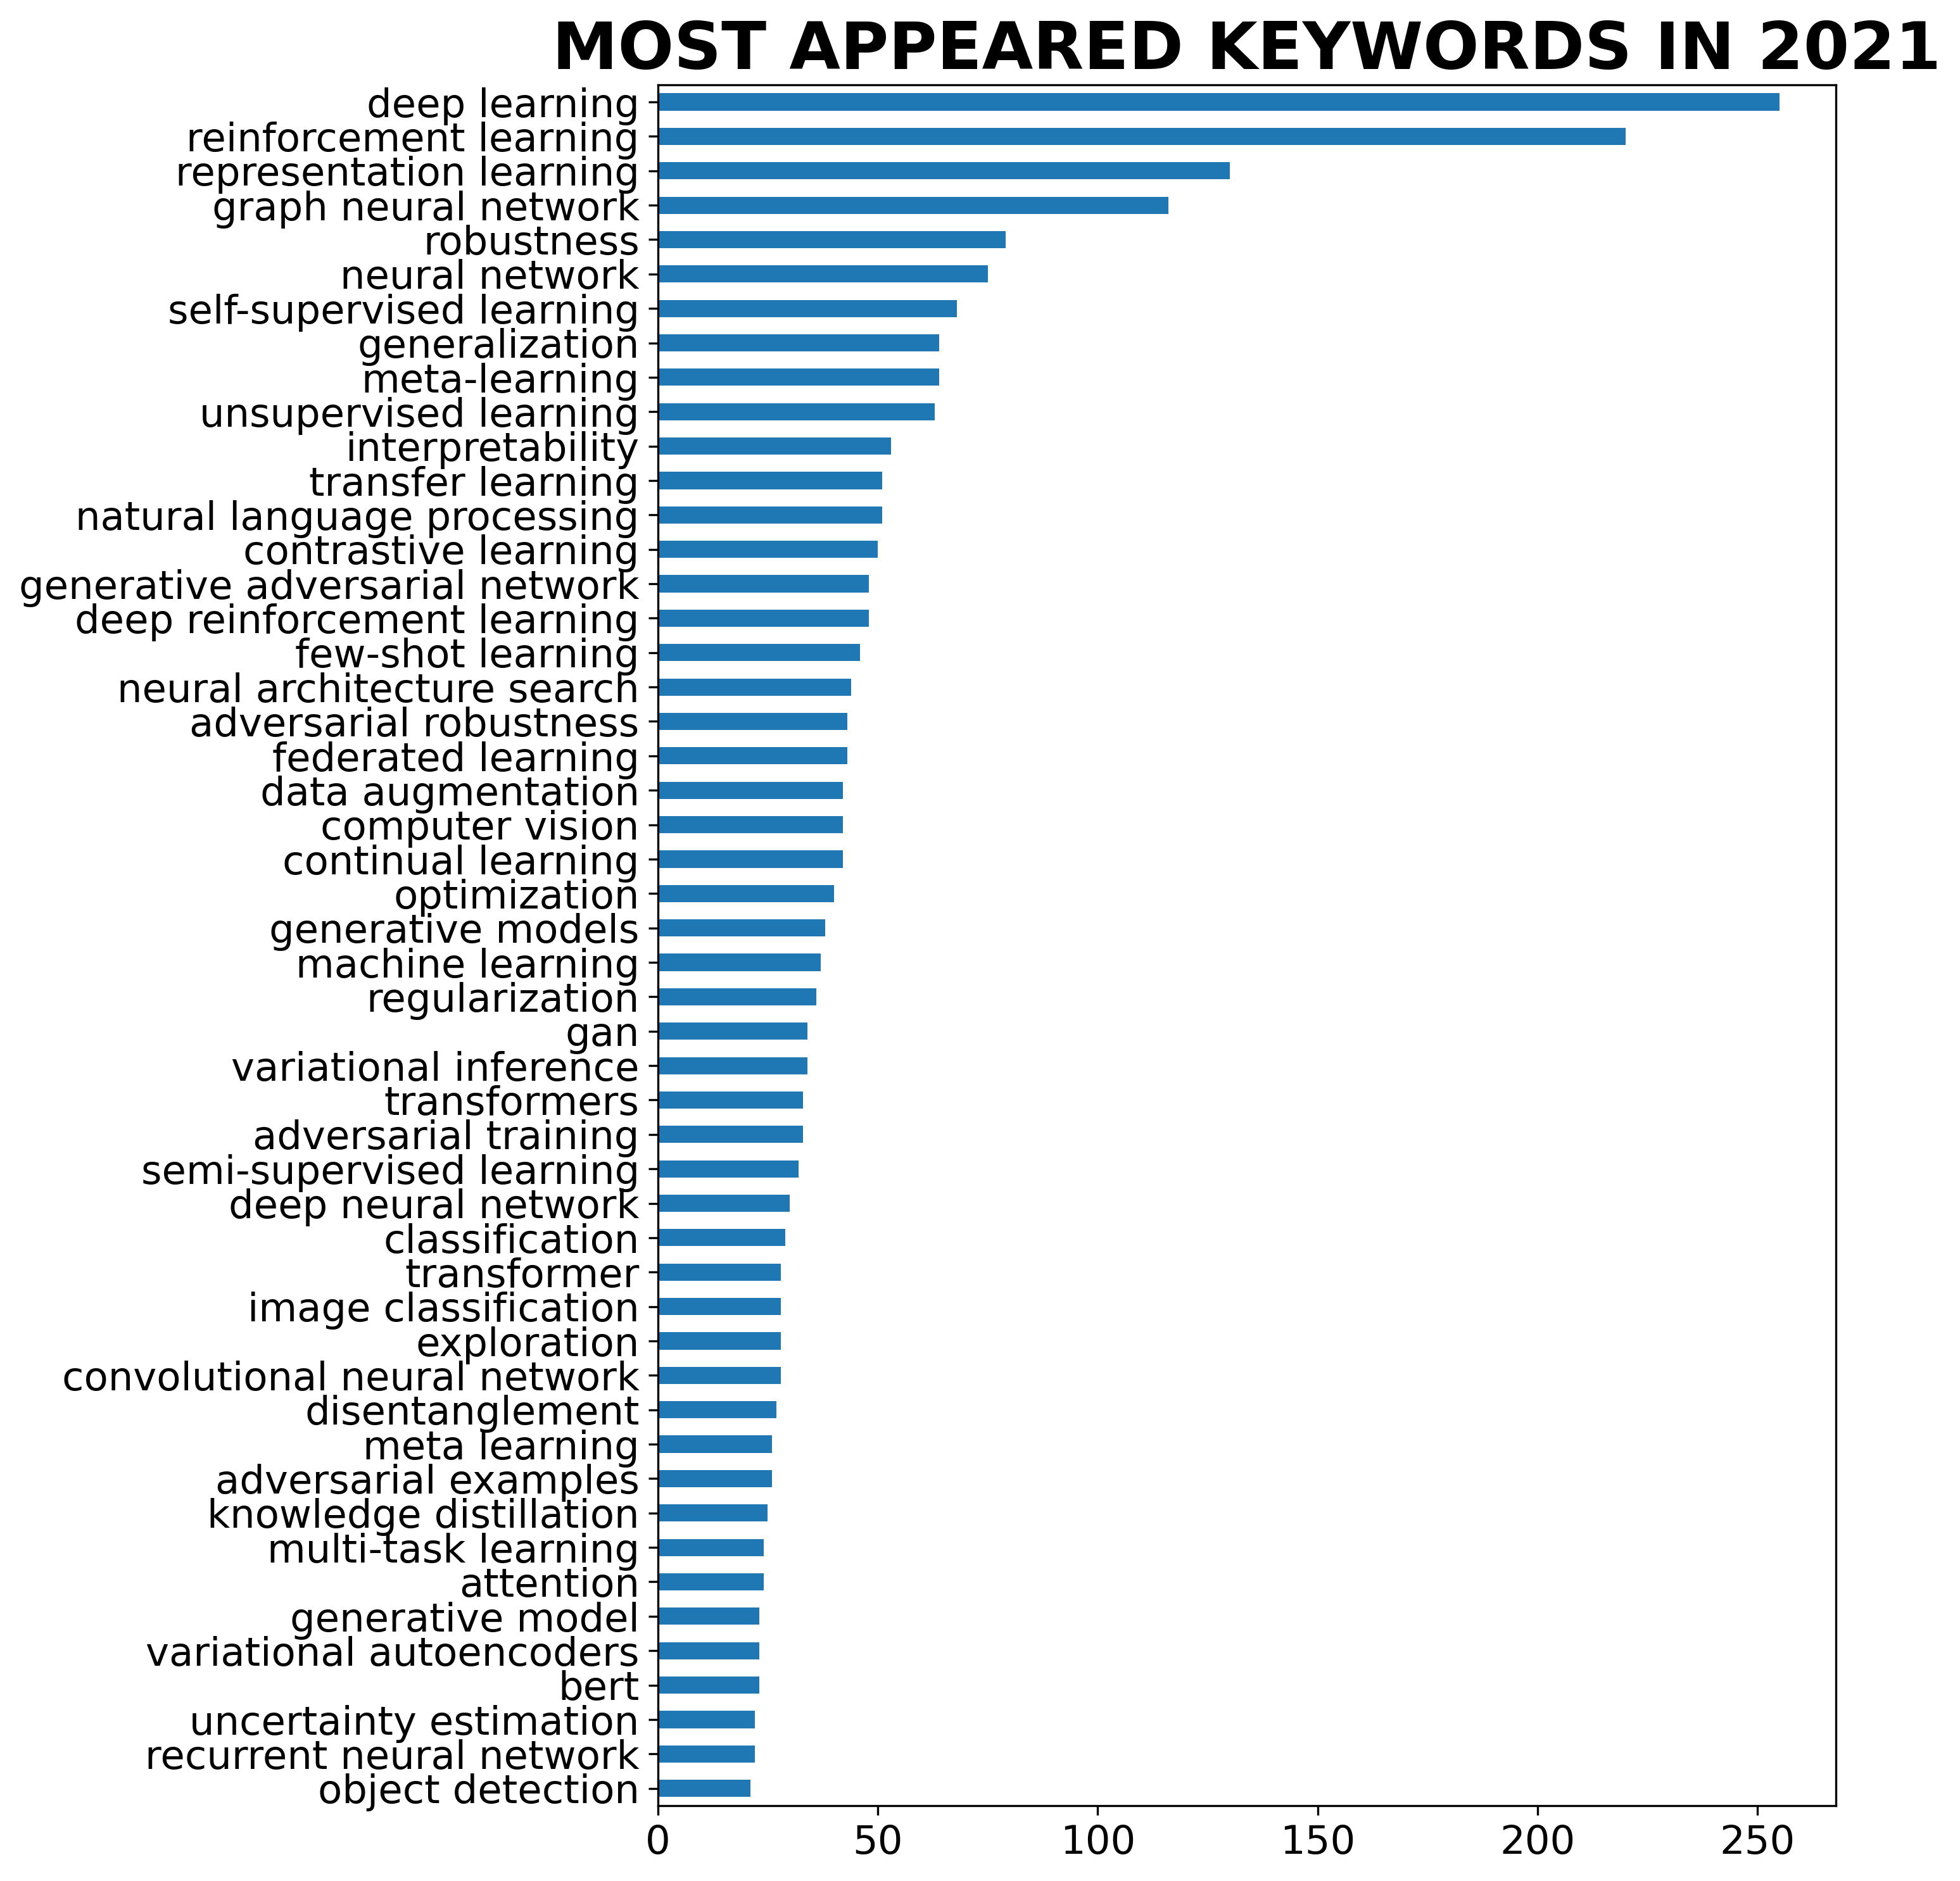

In [21]:
words_keywthd = pd.Series(
    ', '.join(df_allwthd['keywords'].dropna()).lower().replace('networks', 'network').split(',')
).str.strip()

counts_keywthd = words_keywthd.value_counts().sort_values(ascending=True)

plt.subplots(dpi=300)
counts_keywthd.iloc[-50:].plot.barh(figsize=(8, 12), fontsize=15)
plt.title(f'MOST APPEARED KEYWORDS IN 2021', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.savefig('new/most_keywords_allwthd_2021.png', dpi=300, bbox_inches='tight')

## WORD CLOUD

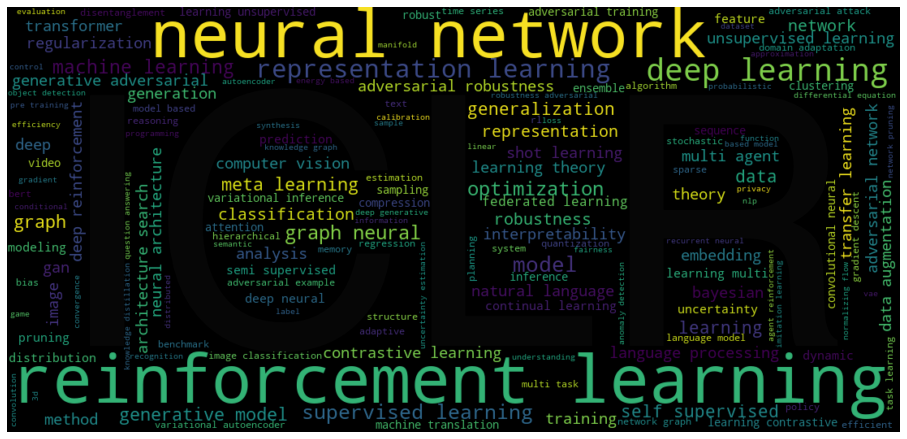

In [22]:
logo = imread('sources/logo.png')
wordcloud = WordCloud(max_words=1800, max_font_size=100,min_font_size=10, random_state=12, mask=logo).generate(' '.join(words_keywthd))

fig = plt.figure(figsize=(16, 8))
plt.imshow(logo)
plt.imshow(wordcloud, interpolation='bilinear', alpha=.98)
plt.axis("off")
plt.savefig('new/logo_wordcloud_keywords_wthd_2021.png', dpi=400, bbox_inches='tight')

### END